In [1]:
%load_ext autoreload

In [6]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig(level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

no race data received


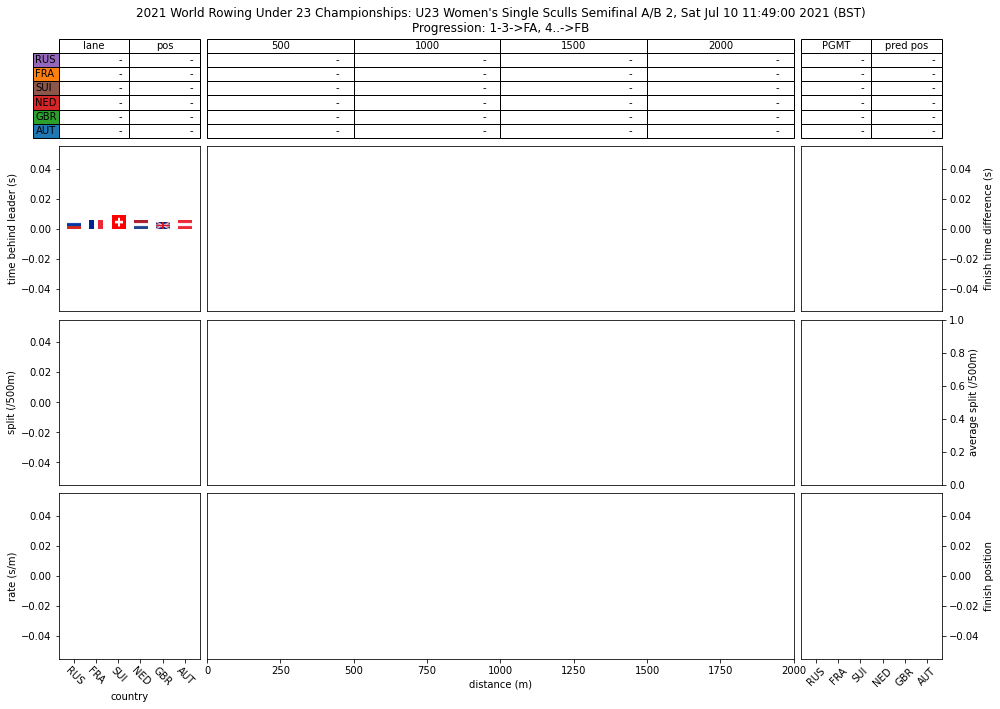

In [7]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.live_notebook_dashboard()

In [9]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Under 23 Championships
/home/matthew/venv/concr/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:598: RuntimeWarning: divide by zero encountered in true_divide
  return other / self._data


,PGMT,Time,WBT,Country,Rank,Lane,Date
Boat,,,,,,,
BLW2-,1.000000,7:27.33,7:27.33,ITA,1,3,2021-07-07 13:00:00
BW4x,0.991085,6:22.51,6:19.10,SUI,1,3,2021-07-09 10:01:00
BLM4x,0.989937,5:50.79,5:47.26,GER,1,1,2021-07-07 13:50:00
BM8+,0.988293,5:26.30,5:22.48,GER,1,2,2021-07-09 09:25:00
BM2-,0.987271,6:24.96,6:20.06,GBR,1,4,2021-07-09 09:40:00
BLW1x,0.986143,7:34.64,7:28.34,ITA,1,3,2021-07-10 08:57:00
BM1x,0.986101,6:48.65,6:42.97,POL,1,3,2021-07-09 08:45:00
BM2x,0.979769,6:15.16,6:07.57,GER,1,5,2021-07-10 09:39:00
BM4x,0.978591,5:47.05,5:39.62,NED,1,3,2021-07-10 10:07:00


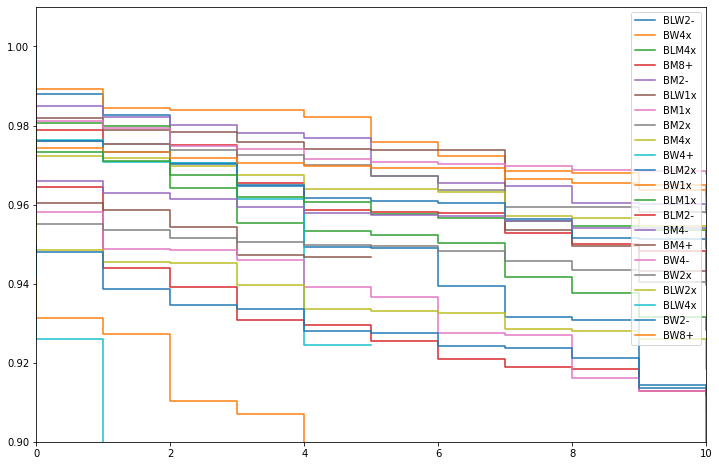

In [13]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.step(range(pgmt.size), pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();